Non-synthetic approach to the analysis.
No imputation of data and all rows with missing data were dropped and columns with missing data and unusefull data.

1. Agasi Herbert
2. Kiberu Davis
3. Fredrick Kakembo


## Installation of the missing libraries

In [ ]:
#!pip install pycaret

# Loading the neccessary modules

In [ ]:
from pycaret.classification import *
from sklearn.impute import SimpleImputer
import pandas as pd
import missingno as msno
#s = setup(data = data, target = 'Price', session_id=123)

## Loading the data

In [ ]:
data = pd.read_csv("/content/20-03-2023_hash_clean.csv")

## Preview of the data

In [ ]:
data.head()

,Study_ID,status,Date_of_entry,Date_of_Birth,Age,Religious_affiliation,Education,Marital_status,Tribe_mother,Tribe_father,...,abortions_ectopic,weight_less,weight_more_than,d_hyp,Months,preg_duration,condom,partner,H_infertility,Gestational_age
0,5001,5.0,19-03-2019,19-12-2000,18.0,1.0,3.0,3.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,1.0,28.0
1,5002,5.0,29-05-2019,28-12-1993,25.0,1.0,4.0,1.0,3.0,3.0,...,0.0,1.0,1.0,1.0,77.0,NaN,1.0,2.0,1.0,26.0
2,5003,5.0,16-05-2019,07-11-1985,33.0,2.0,3.0,1.0,3.0,3.0,...,0.0,1.0,2.0,1.0,30.0,NaN,1.0,2.0,1.0,26.0
3,5004,5.0,21-03-2019,08-05-1991,27.0,1.0,6.0,1.0,3.0,3.0,...,0.0,1.0,2.0,1.0,70.0,NaN,1.0,2.0,1.0,NaN
4,5005,5.0,09-04-2019,02-10-1999,19.0,1.0,3.0,1.0,NaN,3.0,...,1.0,1.0,1.0,1.0,11.0,NaN,1.0,1.0,1.0,38.0


## Dimensions of the data

In [ ]:
data.shape

(1006, 31)

## Missing data

Using the the msno libraary we can get a graphical interpretation of the the missing data.

<Axes: >

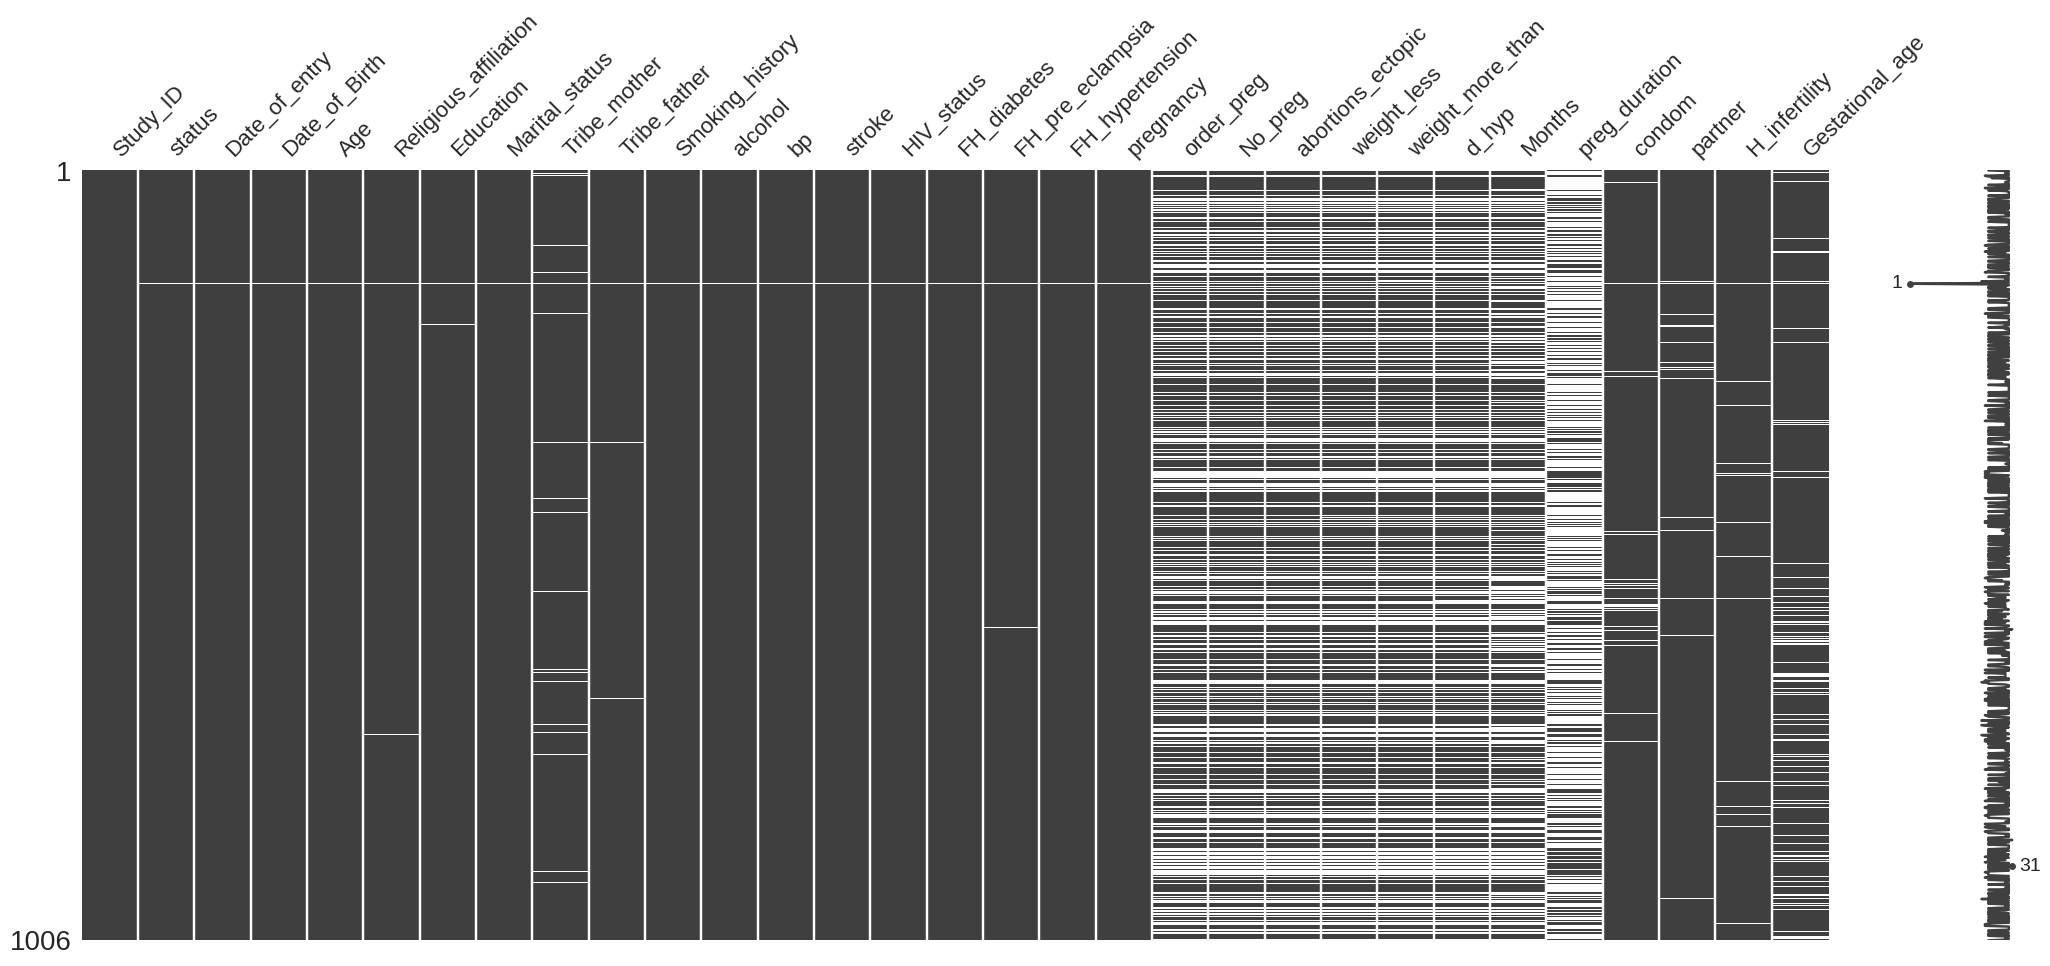

In [ ]:
msno.matrix(data)

## Deriving the label

- Changing all values greater than 0 to 1. 
- This is to get ensure the label is binary.

In [ ]:
mapv ={
            0.0 : 0,
            1.0 : 1,
            2.0 : 1,
            3.0 : 1,
            4.0 : 1,
            5.0 : 1,
            6.0 : 1
            }
data["abortions_ectopic"].replace(mapv,inplace=True)

## Filling the missing abortions_ecotpic with 9090 remove na

In [ ]:
data["abortions_ectopic"].fillna(9090,inplace=True)
data = data[data["abortions_ectopic"]!=9090]

### Finding the numbers within the data.

In [ ]:
print(data.shape)
data.isna().sum()

(647, 31)


Study_ID                   0
status                     0
Date_of_entry              0
Date_of_Birth              0
Age                        0
Religious_affiliation      0
Education                  1
Marital_status             0
Tribe_mother               8
Tribe_father               1
Smoking_history            0
alcohol                    0
bp                         0
stroke                     0
HIV_status                 0
FH_diabetes                0
FH_pre_eclampsia           1
FH_hypertension            0
pregnancy                  0
order_preg                 0
No_preg                    0
abortions_ectopic          0
weight_less                1
weight_more_than           3
d_hyp                      4
Months                    46
preg_duration            643
condom                    28
partner                   14
H_infertility              7
Gestational_age           65
dtype: int64

## Dropping the columns and rows. 

In [ ]:
#Dropping by column
mod_data1 = data.dropna(axis=1,thresh=350)
print(mod_data1.shape)

(647, 30)


In [ ]:
#Dropping by row
mod_data1 = mod_data1.dropna()
print(mod_data1.shape)

(503, 30)


## Graphical representation of the data

<Axes: >

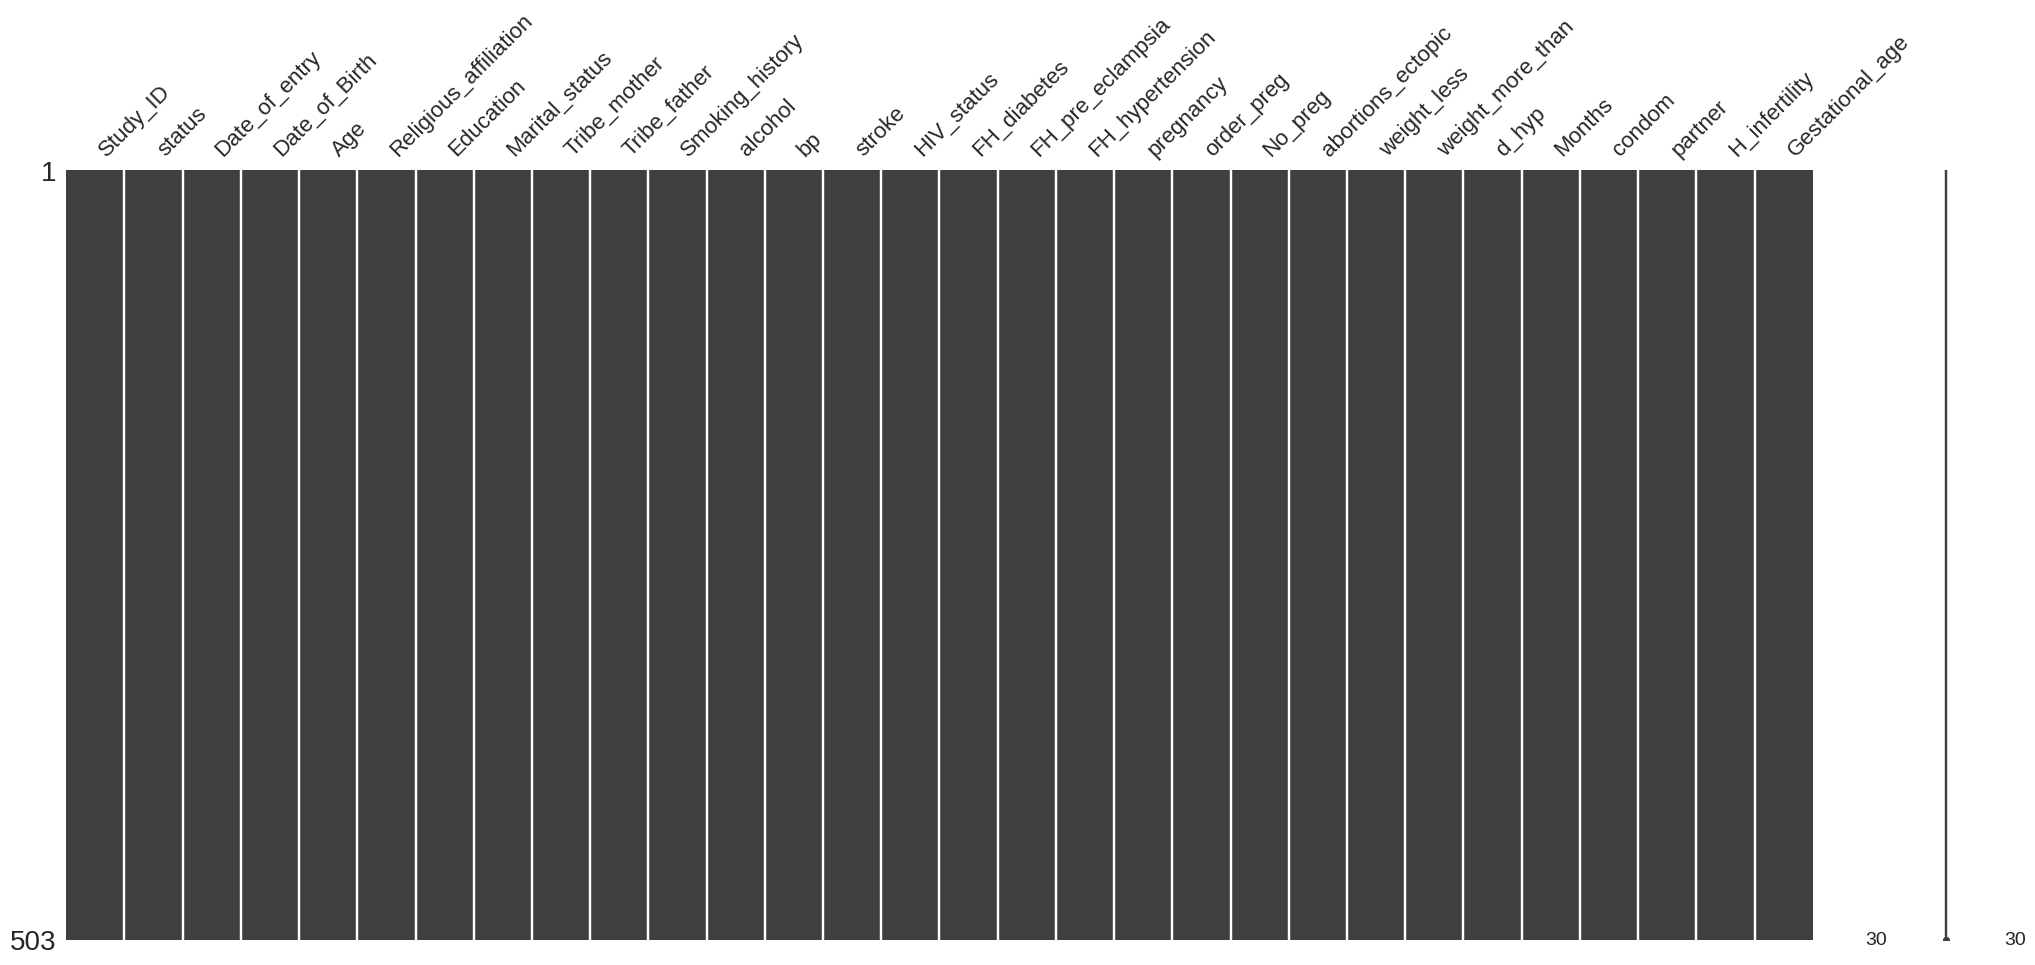

In [ ]:
msno.matrix(mod_data1)

## Comparing the missing columns

In [ ]:
# Assuming df1 and df2 are the two dataframes
common_columns = set(data.columns).intersection(set(mod_data1.columns))
non_common_columns = set(data.columns) - common_columns

print("Common columns in df1:", common_columns)
non_common_columns = set(data.columns) - common_columns
print("Non-common columns in df2:", non_common_columns)

print("The number of columns dopped: {}".format(len(non_common_columns)))
print("The number of rows dopped: {}".format(data.shape[0]-mod_data1.shape[0]))

Common columns in df1: {'Months', 'Marital_status', 'H_infertility', 'order_preg', 'Age', 'abortions_ectopic', 'weight_more_than', 'Study_ID', 'Tribe_mother', 'bp', 'Date_of_entry', 'status', 'Gestational_age', 'FH_diabetes', 'Education', 'partner', 'd_hyp', 'Smoking_history', 'Religious_affiliation', 'HIV_status', 'condom', 'Date_of_Birth', 'FH_hypertension', 'Tribe_father', 'alcohol', 'pregnancy', 'FH_pre_eclampsia', 'stroke', 'No_preg', 'weight_less'}
Non-common columns in df2: {'preg_duration'}
The number of columns dopped: 1
The number of rows dopped: 144


## Preview of the modified data

In [ ]:
mod_data1.head()

,Study_ID,status,Date_of_entry,Date_of_Birth,Age,Religious_affiliation,Education,Marital_status,Tribe_mother,Tribe_father,...,No_preg,abortions_ectopic,weight_less,weight_more_than,d_hyp,Months,condom,partner,H_infertility,Gestational_age
1,5002,5.0,29-05-2019,28-12-1993,25.0,1.0,4.0,1.0,3.0,3.0,...,1.0,0.0,1.0,1.0,1.0,77.0,1.0,2.0,1.0,26.0
2,5003,5.0,16-05-2019,07-11-1985,33.0,2.0,3.0,1.0,3.0,3.0,...,8.0,0.0,1.0,2.0,1.0,30.0,1.0,2.0,1.0,26.0
5,5006,5.0,28-03-2019,15-02-1991,28.0,2.0,6.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,84.0,1.0,1.0,1.0,26.0
6,5007,5.0,27-03-2019,17-04-1994,24.0,1.0,6.0,1.0,2.0,3.0,...,1.0,0.0,1.0,2.0,1.0,35.0,1.0,1.0,1.0,19.0
9,5010,5.0,03-04-2019,04-06-1997,22.0,1.0,3.0,1.0,3.0,3.0,...,1.0,0.0,1.0,1.0,1.0,46.0,1.0,2.0,1.0,12.0


## Determining the number of individuals per class

In [ ]:
mod_data1["abortions_ectopic"].value_counts()

0.0    333
1.0    170
Name: abortions_ectopic, dtype: int64

## Dropping columns that aren't neccessary for the model.

In [ ]:
mod_data1.drop(columns=["Study_ID","Date_of_entry","Date_of_Birth"],inplace=True)

In [ ]:
s = setup(mod_data1,target="abortions_ectopic",session_id=123)

,Description,Value
0,Session id,123
1,Target,abortions_ectopic
2,Target type,Binary
3,Original data shape,"(503, 27)"
4,Transformed data shape,"(503, 27)"
5,Transformed train set shape,"(352, 27)"
6,Transformed test set shape,"(151, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9915,0.9978,0.9833,0.9923,0.9873,0.9809,0.9815,0.5420
xgboost,Extreme Gradient Boosting,0.9687,0.9902,0.9492,0.9646,0.9544,0.9307,0.9336,0.2210
gbc,Gradient Boosting Classifier,0.9659,0.9960,0.9500,0.9556,0.9508,0.9248,0.9271,0.3750
lightgbm,Light Gradient Boosting Machine,0.9631,0.9942,0.9235,0.9690,0.9439,0.9164,0.9189,0.2180
ada,Ada Boost Classifier,0.9544,0.9589,0.9083,0.9606,0.9310,0.8971,0.9008,0.3240
ridge,Ridge Classifier,0.9517,0.0000,0.8659,0.9917,0.9224,0.8877,0.8940,0.1590
lda,Linear Discriminant Analysis,0.9488,0.9922,0.8659,0.9818,0.9185,0.8816,0.8869,0.3520
dt,Decision Tree Classifier,0.9402,0.9357,0.9227,0.9075,0.9118,0.8667,0.8705,0.1120
et,Extra Trees Classifier,0.8070,0.8878,0.5712,0.8138,0.6601,0.5332,0.5564,0.4260
rf,Random Forest Classifier,0.8068,0.9150,0.5121,0.8653,0.6377,0.5189,0.5551,0.6190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]